In [1]:
from sympy import *
from syscirc.plot import plotcont
from syscirc.symbolics import Known, op_lr
from syscirc.components import *

# Circuits Exercise 1
---

## 1. Output V_o(t) for the circuit
---

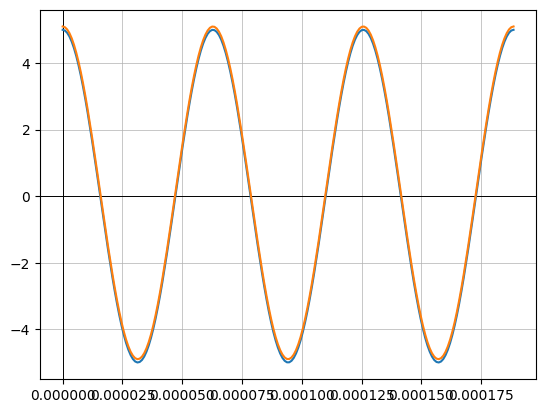

In [2]:
t = Symbol("t", real=True)

ω = Known("ω",1e5)
Vg = Known("V_g", 5*exp(1j*ω*t))
I1 = Known("I_1", Symbol("I_1"))
I2 = Known("I_2", Symbol("I_2"))

R1 = Resistor(Known("R1", 20), "R1", I=I1)
C = Capacitor(Known("C", 2e-7), ω, name="C", I=I1-I2)
L = Inductor(Known("L", 4e-4), ω, name="L", I=I2)
R2 = Resistor(Known("R2", 80), "R2", I=I2)

plotcont([re(Vg), re(5*exp(1j*ω*t))+0.1], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

In [3]:
loop1 = Eq(Vg, R1.V + C.V)
loop1 = Known.resolve(loop1, exclude=Vg)
loop1

Eq(V_g, I_1*Z_R1 + Z_C*(I_1 - I_2))

In [4]:
loop2 = Eq(0, -C.V + L.V + R2.V)
loop2 = Known.resolve(loop2, exclude=Vg)
loop2

Eq(0, I_2*Z_L + I_2*Z_R2 - Z_C*(I_1 - I_2))

In [5]:
I_dict = solve([loop1, loop2], [I1, I2])
I1.value = I_dict[I1]
I2.value = I_dict[I2]
I = Matrix([I1, I2])
Known.resolve(I)

Matrix([
[(V_g*Z_C + V_g*Z_L + V_g*Z_R2)/(Z_C*Z_L + Z_C*Z_R1 + Z_C*Z_R2 + Z_L*Z_R1 + Z_R1*Z_R2)],
[                       V_g*Z_C/(Z_C*Z_L + Z_C*Z_R1 + Z_C*Z_R2 + Z_L*Z_R1 + Z_R1*Z_R2)]])

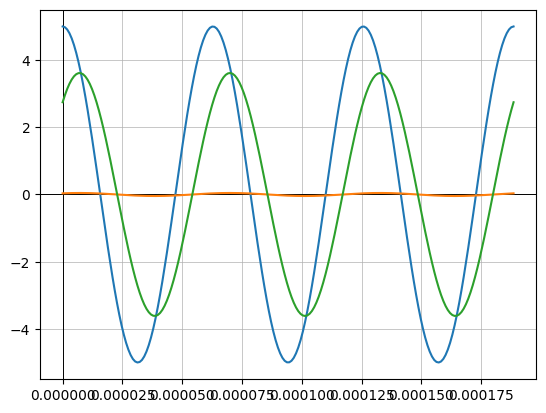

In [6]:
plotcont([re(Vg), L.i, R2.v], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

In [7]:
V_o = Known.resolve(R2.v, levels=-1).simplify()
V_o

2.35294117647059*sin(100000.0*t) + 2.74509803921569*cos(100000.0*t)

In [8]:
I_vals = Known.resolve(I, levels=-1, evalf=True)
Matrix([I_vals[0].simplify(), I_vals[1].simplify()])

Matrix([
[ (0.053921568627451 + 0.0490196078431373*I)*exp(100000.0*I*t)],
[(0.0343137254901961 - 0.0294117647058823*I)*exp(100000.0*I*t)]])

In [9]:
L_i = Known.resolve(L.i, levels=-1).simplify()
L_i

0.0294117647058823*sin(100000.0*t) + 0.0343137254901961*cos(100000.0*t)

Formula from https://www.dsprelated.com/showarticle/635.php

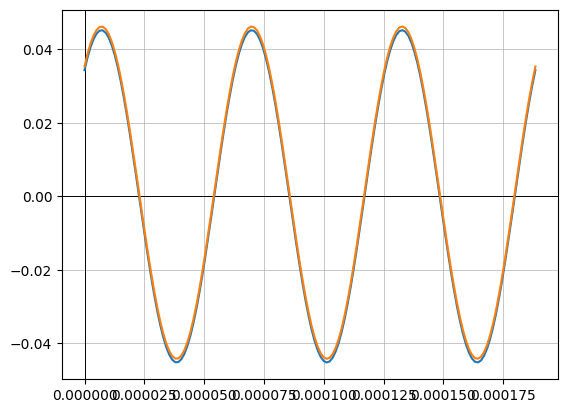

0.0451938453788867*cos(100000.0*t - 0.708626272127669)

In [10]:
L_i_ = sqrt(0.0294117647058823**2 + 0.0343137254901961**2)* cos(1e5*t - atan(0.0294117647058823/0.0343137254901961))
plotcont([L.i, L_i_+0.001], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
L_i_

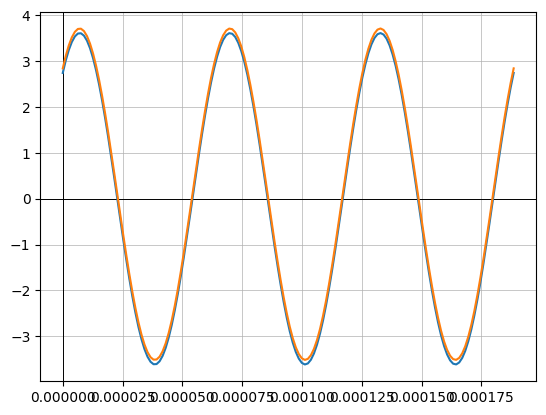

3.61550763031094*cos(100000.0*t - 0.70862627212767)

In [11]:
V_o_ = sqrt(2.74509803921569**2 + 2.35294117647059**2)* cos(1e5*t - atan(2.35294117647059/2.74509803921569))
plotcont([R2.v, V_o_+0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o_

## 2. Phase shift by π/3
---

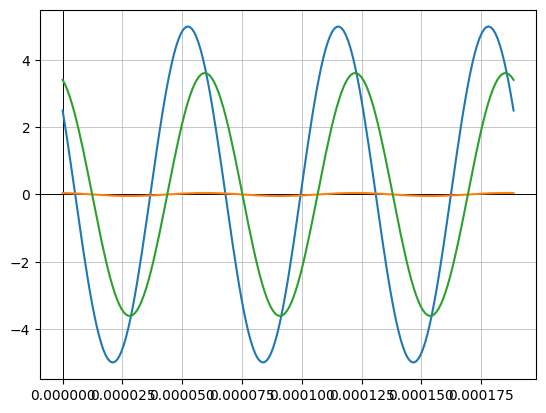

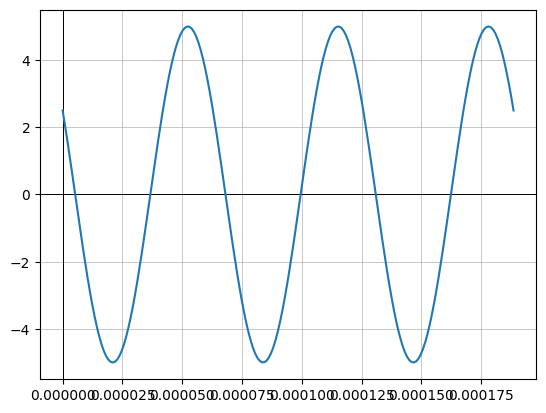

2.35294117647059*sin(100000.0*t + 0.333333333333333*pi) + 2.74509803921569*cos(100000.0*t + 0.333333333333333*pi)

In [12]:
Vg.value = 5*exp(1j*(ω*t+pi/3))
plotcont([re(Vg), L.i, R2.v], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)
plotcont(re(5*exp(1j*(ω*t+pi/3))), [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

V_o = Known.resolve(R2.v, levels=-1).simplify()
V_o

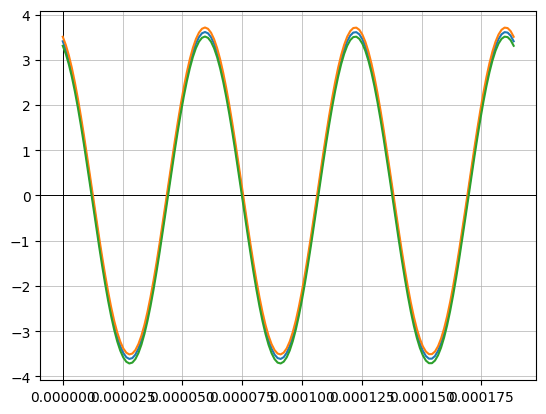

3.61550763031094*cos(100000.0*t - 0.70862627212767 + pi/3)

In [13]:
V_o_ = sqrt(2.74509803921569**2 + 2.35294117647059**2)* cos(1e5*t - atan(2.35294117647059/2.74509803921569)+pi/3)
plotcont([R2.v, V_o+0.1, V_o_-0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o_

In [14]:
(-atan(2.35294117647059/2.74509803921569)+pi/3).evalf()

0.338571279068928

## 3. Time delay by 3 seconds
---

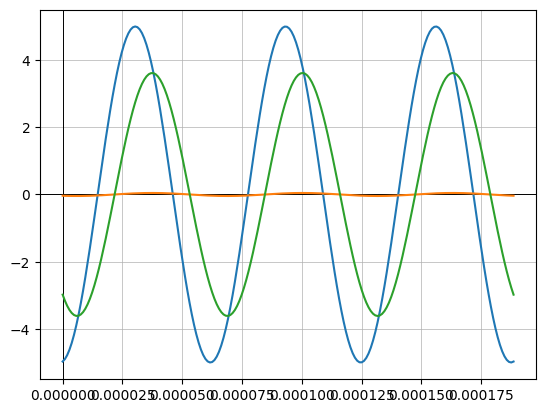

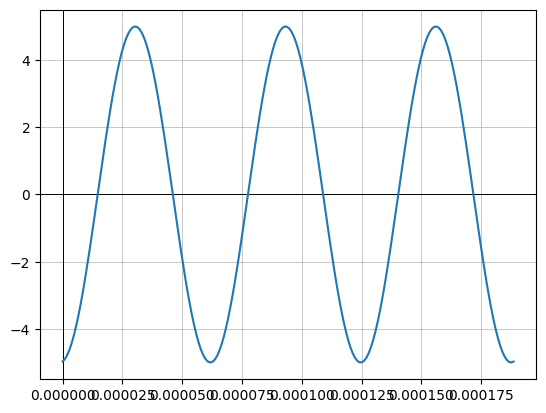

In [15]:
Vg.value = 5*exp(1j*(ω*(t-3)))
plotcont([re(Vg), L.i, R2.v], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)
plotcont(re(5*exp(1j*(ω*(t-3)))), [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

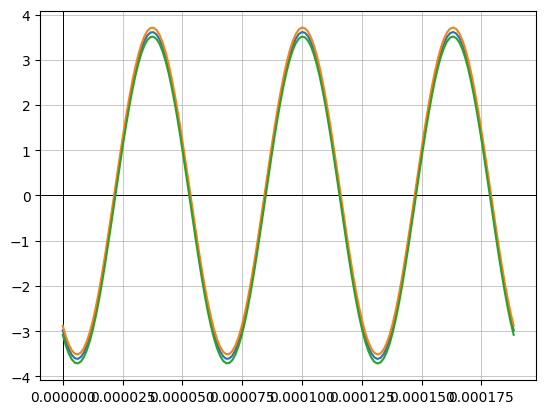

3.61550763031094*cos(100000.0*t - 300000.708626272)

In [16]:
V_o_ = sqrt(2.74509803921569**2 + 2.35294117647059**2)* cos(1e5*t - 3e5 - atan(2.35294117647059/2.74509803921569))
V_o = Known.resolve(R2.v, levels=-1).simplify()
plotcont([R2.v, V_o+0.1, V_o_-0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o_

## 4. Change the input to v_o(t) = 2*cos(10*π*t - π/3) - 4*sin(2*π*t + 1.2)
---

In [17]:
A = Known("A", Symbol("A"))
phi = Known("φ", Symbol("φ"))

In [40]:
# First part of the signal
A.value = 2
ω.value = 10*pi
phi.value = -pi/3

Vg.value = A*exp(1j*(ω*t+phi))

In [47]:
Vg1 = Known("V_g_1", Vg.evalf())
Vo1 = Known("V_o_1", Known.resolve(R2.v, levels=-1, evalf=True).simplify())

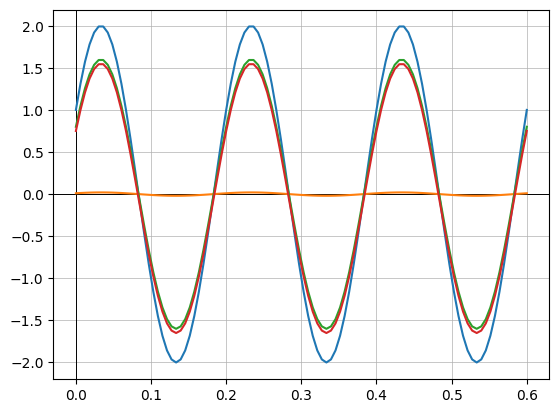

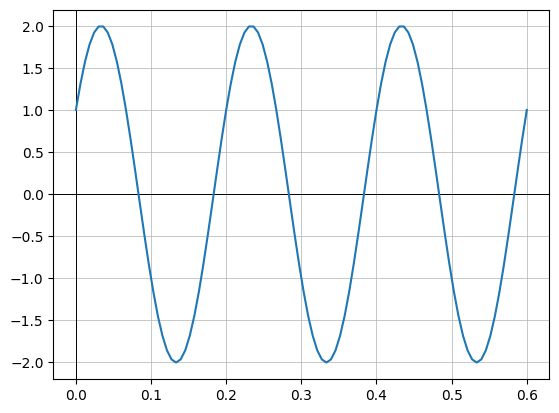

In [44]:
plotcont([re(Vg1), L.i, R2.v, re(Vo1)-0.05], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)
plotcont(2*cos(10*pi*t - pi/3), [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

In [45]:
Vg1.value

2*exp(1.0*I*(10*pi*t - pi/3))

In [46]:
Vo1.value

80000000.0*im(exp(0.333333333333333*I*pi*(30*t - 1))/(-50000000.0*I + pi*(3600.0 + 0.08*I*pi)))

In [48]:
# Second part of the signal
A.value = -4
ω.value = 2*pi
phi.value = 1.2-pi/2

Vg.value = A*exp(1j*(ω*t+phi))

In [49]:
Vg2 = Known("V_g_2", Vg.evalf())
Vo2 = Known("V_o_2", Known.resolve(R2.v, levels=-1, evalf=True).simplify())

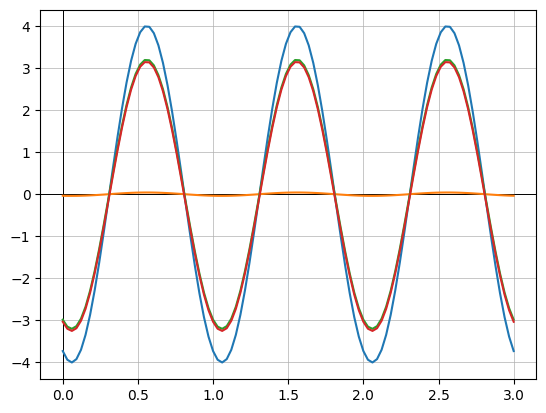

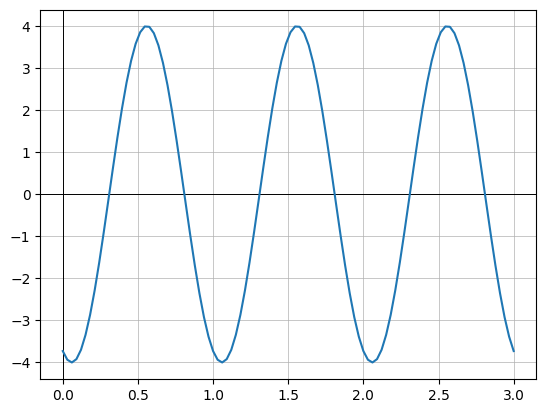

In [73]:
plotcont([re(Vg2), L.i, R2.v, re(Vo2)-0.05], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)
plotcont(-4*sin(2*pi*t + 1.2), [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

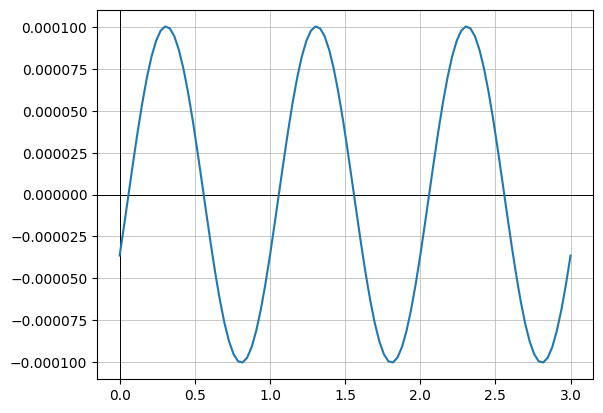

In [57]:
plotcont([L.v], [0, 3*(2*pi/ω.evalf())], nsamples=100, vars=t)

In [51]:
Vg2.value

-4*exp(1.0*I*(2*pi*t - pi/2 + 1.2))

In [52]:
Vo2.value

800000000.0*im(exp(0.5*I*(4*pi*t - pi + 2.4))/(-pi*(3600.0 + 0.016*I*pi) + 250000000.0*I))

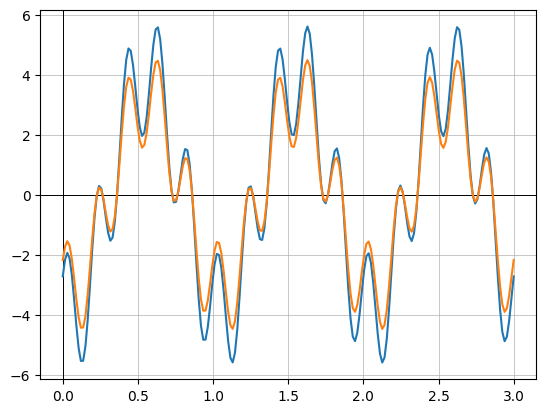

In [53]:
VgT = Known("V_g_T", Vg1 + Vg2)
VoT = Known("V_o_T", Vo1 + Vo_2)
plotcont([re(VgT), VoT], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

In [62]:
Vo_final = Known.resolve(VoT, levels=-1, evalf=True).simplify()
Vo_final

800000000.0*im(exp(0.5*I*(4*pi*t - pi + 2.4))/(-pi*(3600.0 + 0.016*I*pi) + 250000000.0*I)) - 80000000.0*im(exp(0.333333333333333*I*pi*(30*t - 1))/(-pi*(3600.0 + 0.08*I*pi) + 50000000.0*I))

In [71]:
Vo_simplified = -8e8*re( -exp(1j*(2*pi*t-pi+1.2))/(pi*3600+0.016j*pi**2+2.5e8j) + 1/10*exp(1j*(10*pi*t-pi/3-pi/2))/(pi*3600+0.08j*pi**2+5e7j))
Vo_simplified

800000000.0*re(exp(1.0*I*(2*pi*t - pi + 1.2))/(3600*pi + 0.016*I*pi**2 + 250000000.0*I)) - 80000000.0*re(exp(1.0*I*(10*pi*t - 5*pi/6))/(3600*pi + 0.08*I*pi**2 + 50000000.0*I))

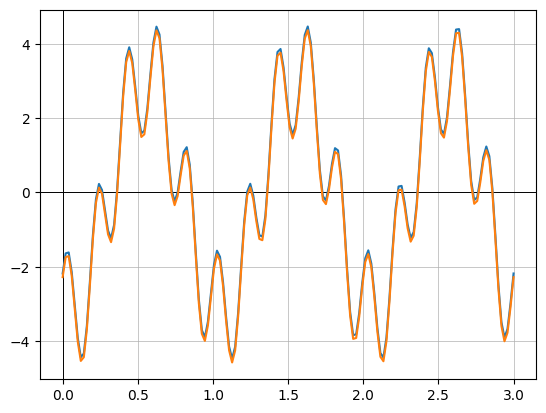

In [72]:
plotcont([Vo_final, Vo_simplified-0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)

## 4. Now v_g(t)=cos(ω*t)
---

In [ ]:
ω.value = Symbol("ω")

Vg.value = exp(1j*(ω*t))